In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb


Dataset loading

In [21]:
# Path to dataset
dataset_path = '/content/data.csv'

data = pd.read_csv(dataset_path, error_bad_lines=False, encoding='latin-1')
df=data

# Display the first few rows of the dataset
print(df.head())


<ipython-input-21-434d48a9b930>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(dataset_path, error_bad_lines=False, encoding='latin-1')


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [6]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [7]:
print(df.describe())


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [22]:
#Overview of Dataset Details
print("Dataset Overview:")
print(data.info())

#Preview the initial records of the dataset
print("\nInitial Records of the Dataset:")
print(data.head())

#Statistical summary for numerical fields
print("\nStatistical Overview for Numerical Fields:")
print(data.describe())

#Examination of null values
print("\nNull Value Analysis:")
print(data.isnull().sum())

# Visualize numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')

# Visualize categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.show()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Initial Records of the Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER B

Data Columns

In [9]:
print(data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Quantity and Unit Price

<ipython-input-10-93acfb5ba9ec>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/data.csv', error_bad_lines=False, encoding='unicode_escape')


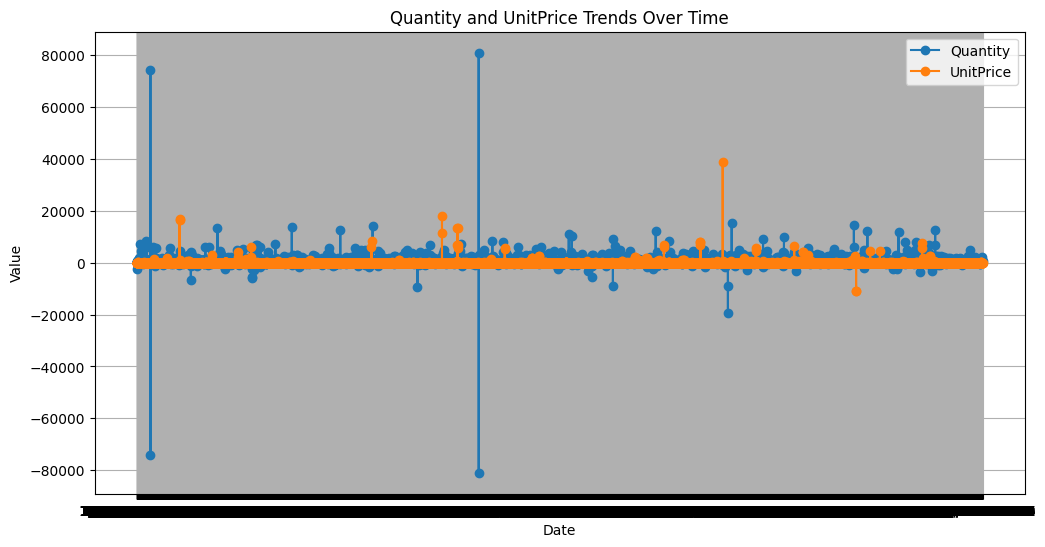

In [10]:
quantity_data = data[['InvoiceDate', 'Quantity']]
unit_price_data = data[['InvoiceDate', 'UnitPrice']]


data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

quantity_by_date = quantity_data.groupby('InvoiceDate').sum()
unit_price_by_date = unit_price_data.groupby('InvoiceDate').mean()

plt.figure(figsize=(12, 6))
plt.plot(quantity_by_date.index, quantity_by_date['Quantity'], label='Quantity', marker='o', linestyle='-')
plt.plot(unit_price_by_date.index, unit_price_by_date['UnitPrice'], label='UnitPrice', marker='o', linestyle='-')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Quantity and UnitPrice Trends Over Time')
plt.legend()

# Display the plot with a grid for better readability
plt.grid(True)
plt.show()


Top countries by revenue

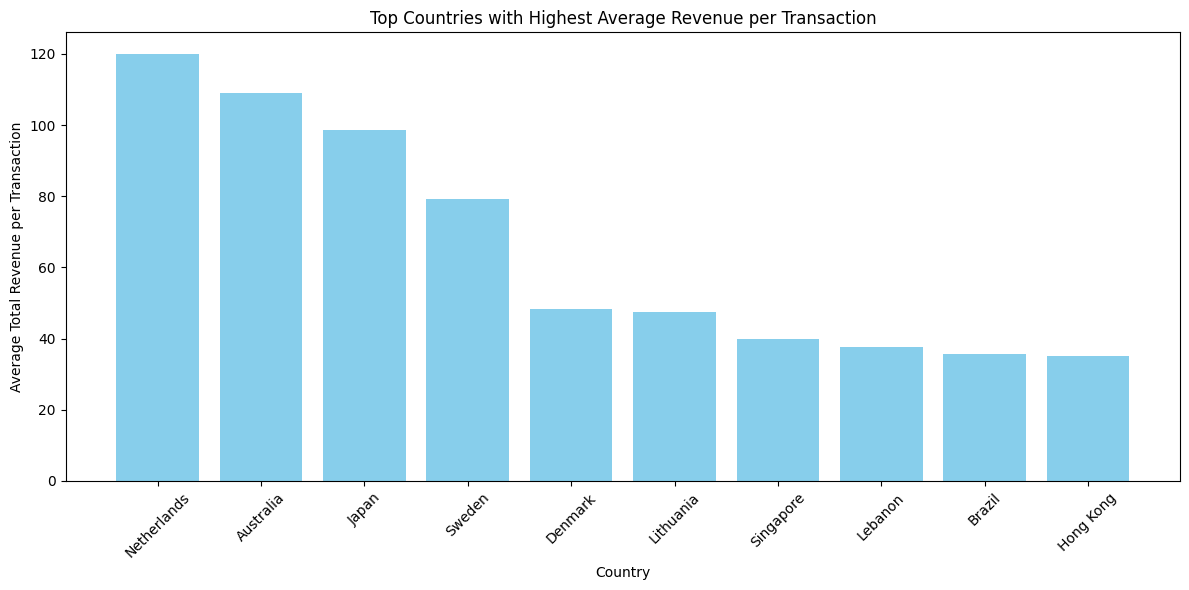

In [11]:
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
revenue_by_country = data.groupby('Country')['TotalRevenue'].mean().sort_values(ascending=False)

# Top countries
top_N = 10
top_countries = revenue_by_country.head(top_N)

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Total Revenue per Transaction')
plt.title('Top Countries with Highest Average Revenue per Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
columns_list = df.columns.tolist()
print("Total Columns in the data:")
print(columns_list)


Total Columns in the data:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


Distribution and Co-relation Matrix

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Basic statistics of numerical columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15

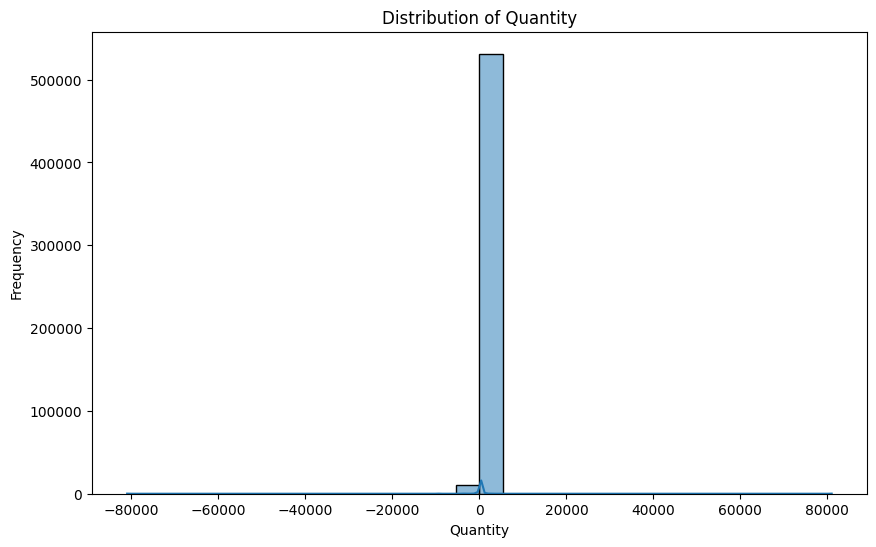

<ipython-input-18-b5f9feffff92>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


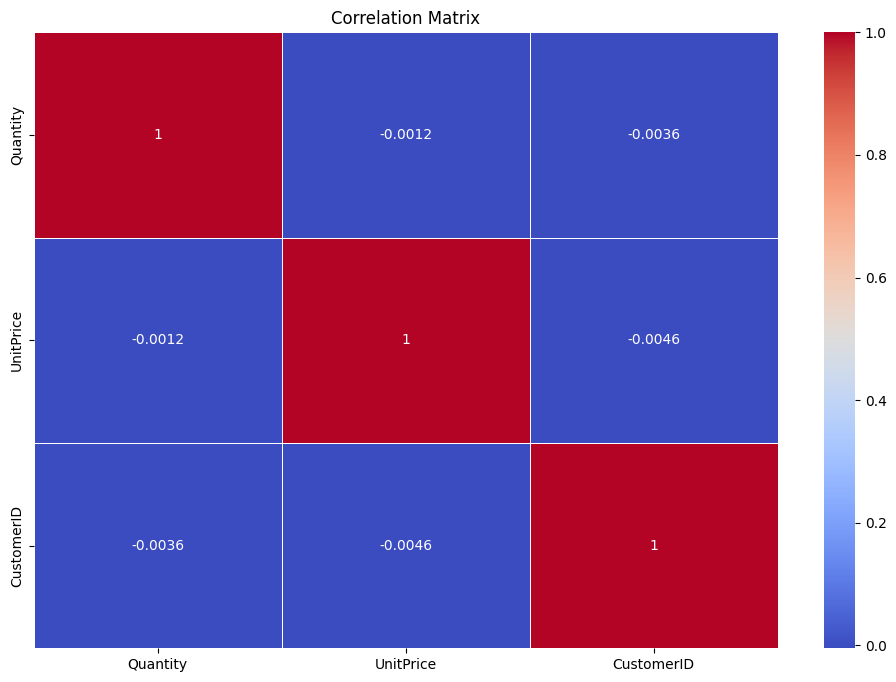

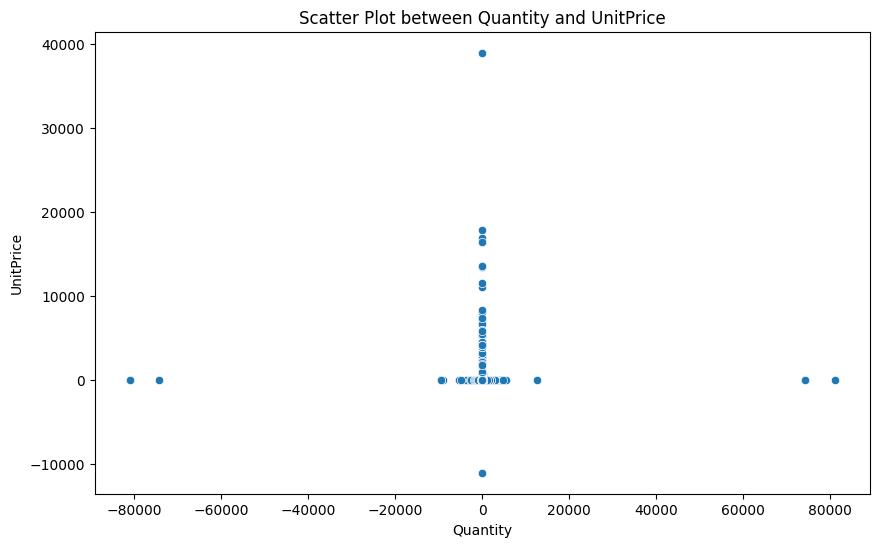

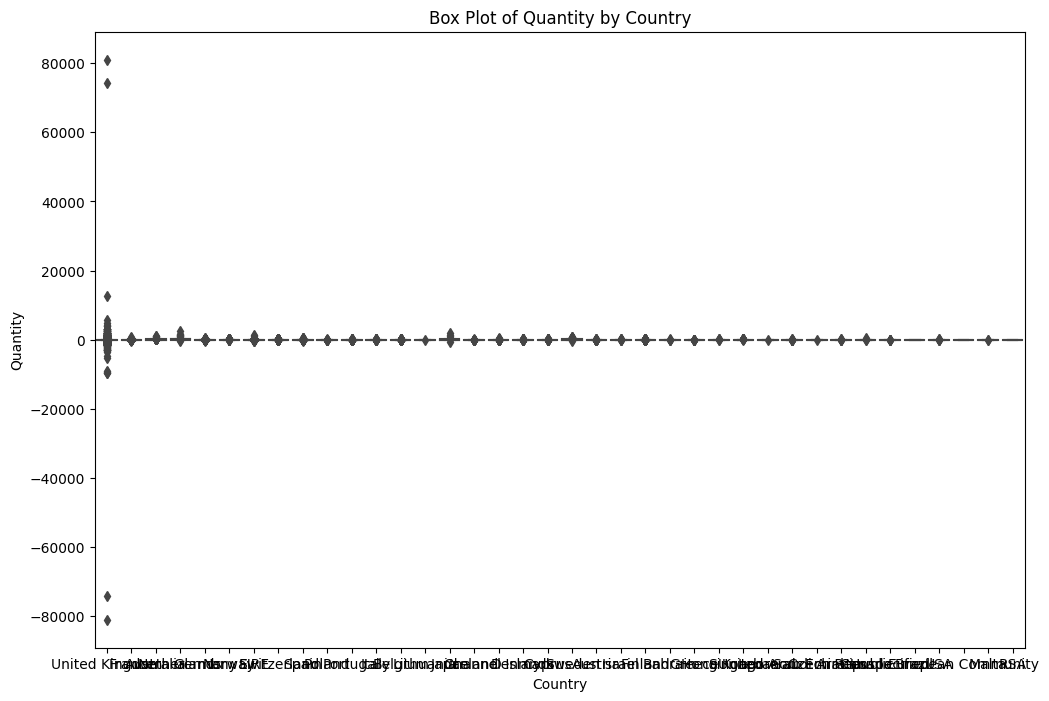

In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')

print("First few rows of the dataset:")
print(df.head())


print("\nSummary statistics of numerical fields:")
print(df.describe())


print("\nExamine missing values in the dataset:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot between Quantity and UnitPrice')
plt.show()

# Box plot for categorical vs numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.title('Box Plot of Quantity by Country')
plt.show()


In [ ]:

# Columns in dataset
print(f"Columns in the dataset: {len(df.columns)}")

print("Actual column names:")
print(df.columns)


Number of columns in the dataset: 8
Actual column names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Nueral Network model and Classification report

<ipython-input-31-c06fdcd2c893>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/data.csv', error_bad_lines=False, encoding='unicode_escape')


Epoch 1/25
13548/13548 [==============================] - 34s 2ms/step - loss: 0.5040 - accuracy: 0.9145 - val_loss: 0.4844 - val_accuracy: 0.9128
Epoch 2/25
13548/13548 [==============================] - 32s 2ms/step - loss: 0.4773 - accuracy: 0.9147 - val_loss: 0.4785 - val_accuracy: 0.9128
Epoch 3/25
13548/13548 [==============================] - 33s 2ms/step - loss: 0.4688 - accuracy: 0.9147 - val_loss: 0.4745 - val_accuracy: 0.9128
Epoch 4/25
13548/13548 [==============================] - 33s 2ms/step - loss: 0.4655 - accuracy: 0.9147 - val_loss: 0.4753 - val_accuracy: 0.9128
Epoch 5/25
13548/13548 [==============================] - 33s 2ms/step - loss: 0.4637 - accuracy: 0.9147 - val_loss: 0.4700 - val_accuracy: 0.9128
Epoch 6/25
13548/13548 [==============================] - 33s 2ms/step - loss: 0.4621 - accuracy: 0.9147 - val_loss: 0.4707 - val_accuracy: 0.9128
Epoch 7/25
13548/13548 [==============================] - 32s 2ms/step - loss: 0.4610 - accuracy: 0.9147 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       254
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       402
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00       159
           7       0.00      0.00      0.00       123
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        68
          10       0.00      0.00      0.00      1708
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00       125
          13       0.00      0.00      0.00      1727
          14       0.51      0.04      0.07      1985
          15       0.00      0.00      0.00        36
          16       0.00      0.00      0.00        53
   

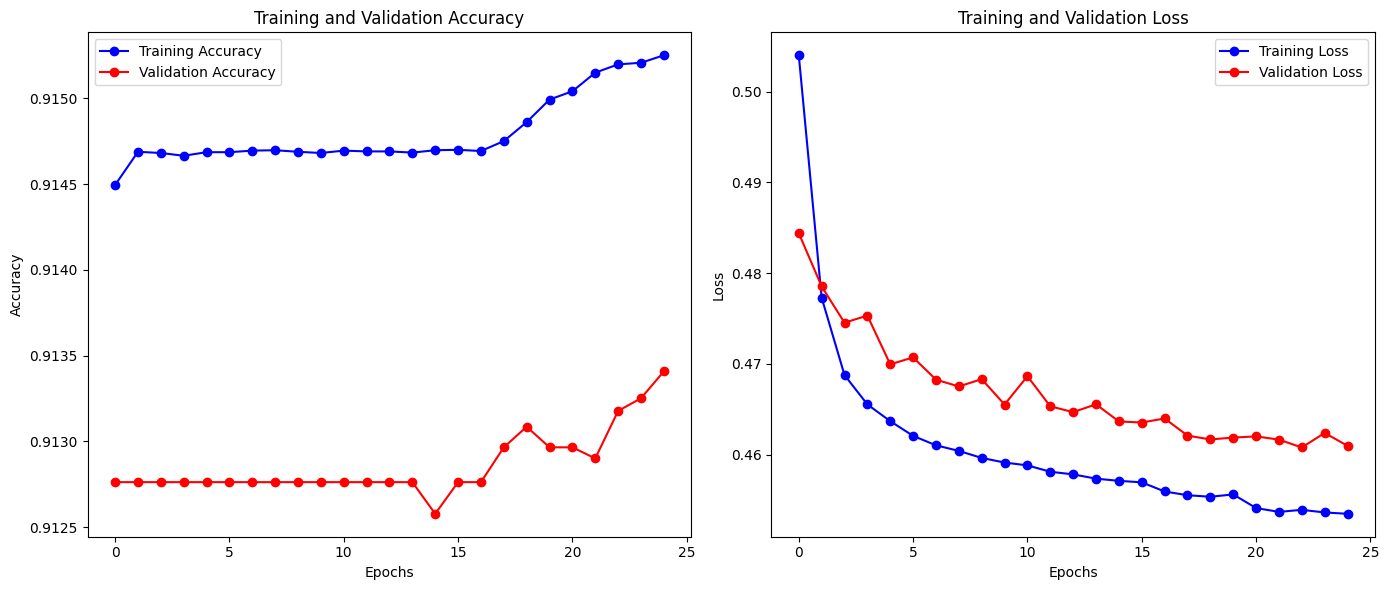

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


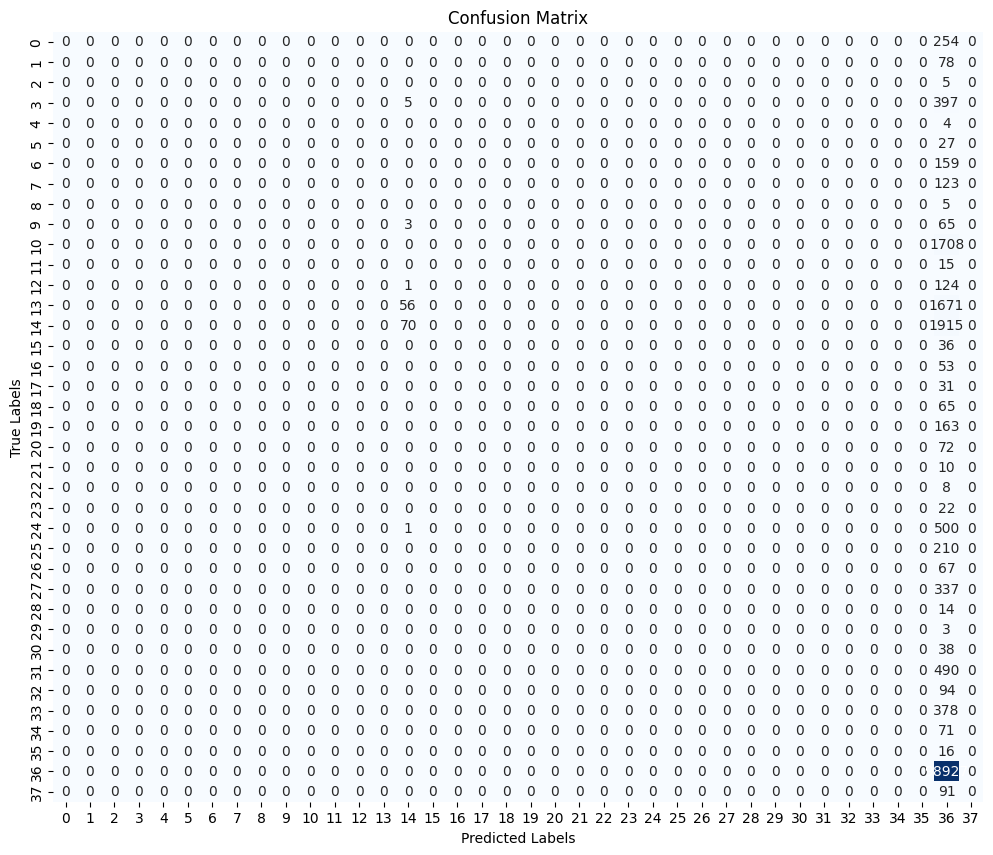

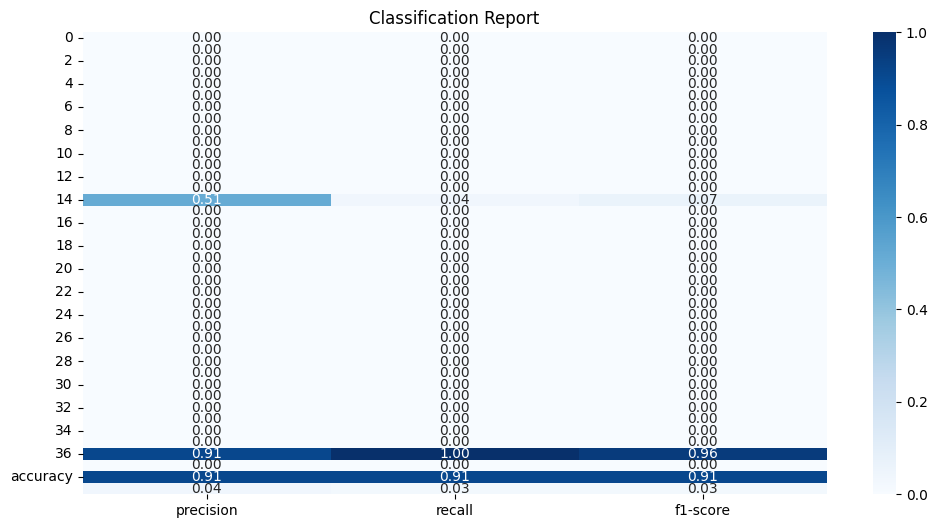

In [ ]:
#Train by x and y
X = df[['Quantity', 'UnitPrice']]
y = df['Country']

# Convert features to NumPy arrays with float32 data type
X_np = X.astype(np.float32).values

# split and label encoding
X_train, X_test, y_train, y_test = train_test_split(X_np, y, test_size=0.2, random_state=42)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_onehot = tf.keras.utils.to_categorical(np.array(y_train_encoded), num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(np.array(y_test_encoded), num_classes=num_classes)

# Standardize and scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 25 epochs
history = model.fit(X_train, y_train_onehot, epochs=25, batch_size=32, verbose=1, validation_data=(X_test, y_test_onehot))


y_pred_proba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_test_encoded = np.argmax(y_test_onehot, axis=1)


print("Classification Report:\n", classification_report(y_test_encoded, y_pred_classes))
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Accuracy: {accuracy:.2%}")


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test_encoded, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


plt.figure(figsize=(12, 6))
report = classification_report(y_test_encoded, y_pred_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')

plt.show()


Investing habits over time

<ipython-input-38-e919667b6b51>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/data.csv', error_bad_lines=False, encoding='unicode_escape')


3387/3387 [==============================] - 7s 2ms/step


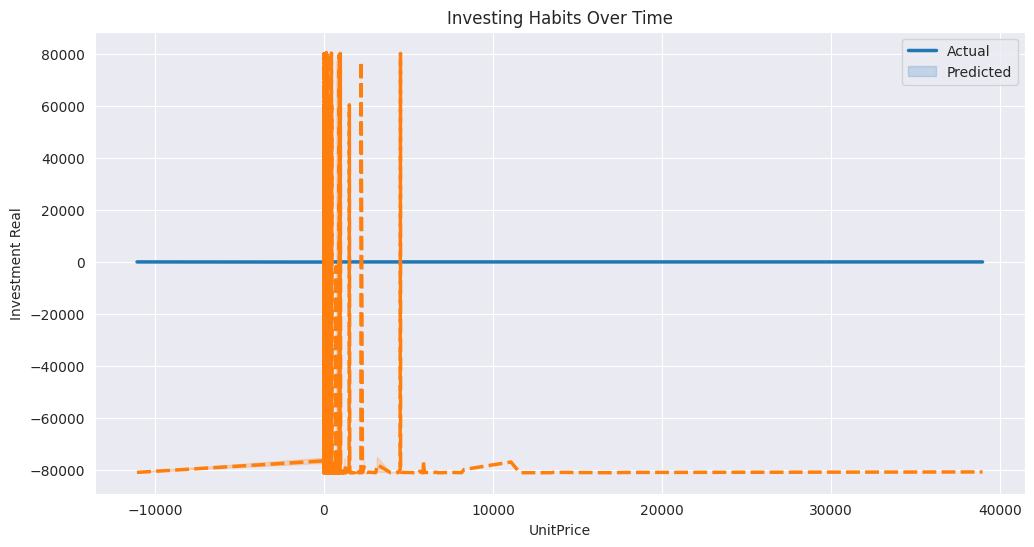

In [ ]:
y_pred = model.predict(X_test)

y_test_original = scaler.inverse_transform(y_test_normalized.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

min_length = min(len(df['UnitPrice']), len(y_test_original), len(y_pred_original))


df_visualization = pd.DataFrame({
    'UnitPrice': df['UnitPrice'].values[:min_length],  # Match 'UnitPrice' to the test set
    'Actual Investment Real': y_test_original[:min_length].squeeze(),
    'Predicted Investment Real': y_pred_original[:min_length].squeeze()
})

df_visualization.set_index('UnitPrice', inplace=True)


plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.lineplot(data=df_visualization, palette="tab10", linewidth=2.5)
plt.title('Investing Habits Over Time')
plt.xlabel('UnitPrice')
plt.ylabel('Investment Real')
plt.legend(['Actual', 'Predicted'])
plt.show()


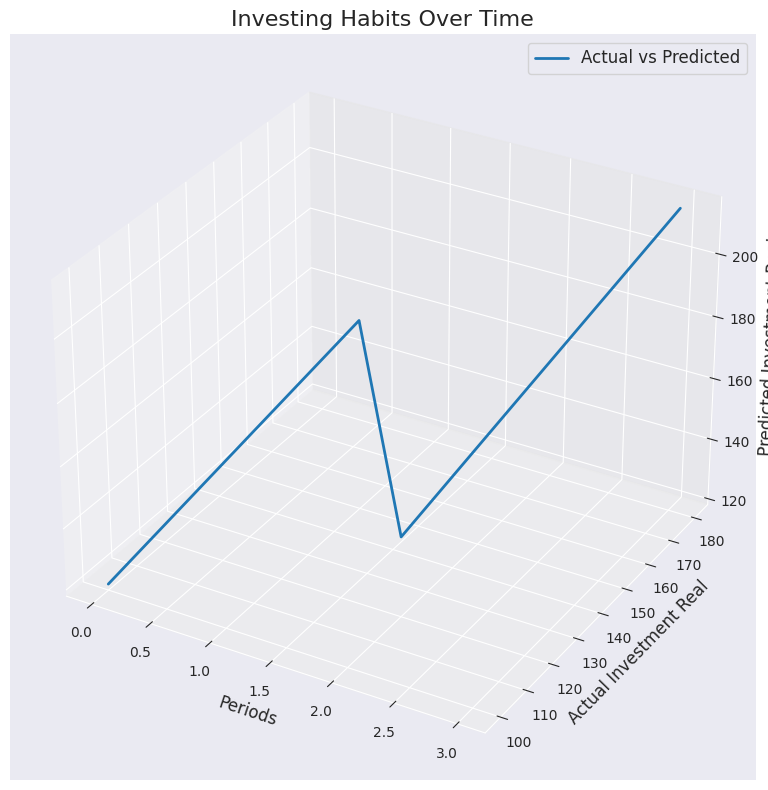

In [ ]:

periods = ['2022-01', '2022-02', '2022-03', '2022-04']
y_test = pd.Series(['100', '150', '120', '180'])

y_test_numeric = pd.to_numeric(y_test, errors='coerce')

valid_indices = y_test_numeric.notna()
y_test_numeric = y_test_numeric[valid_indices]

y_pred = y_test_numeric * 1.2

# DataFrame for visualization
df = pd.DataFrame({
    'Periods': periods[-len(y_test_numeric):],
    'Actual Investment Real': y_test_numeric.values,
    'Predicted Investment Real': y_pred.values
})

# 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual and predicted investment_real values as a 3D line
ax.plot(df.index, df['Actual Investment Real'], df['Predicted Investment Real'], label='Actual vs Predicted', linewidth=2)

ax.set_title('Investing Habits Over Time', fontsize=16)
ax.set_xlabel('Periods', fontsize=12)
ax.set_ylabel('Actual Investment Real', fontsize=12)
ax.set_zlabel('Predicted Investment Real', fontsize=12)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


Optimal K and box plot of quantity and unit price

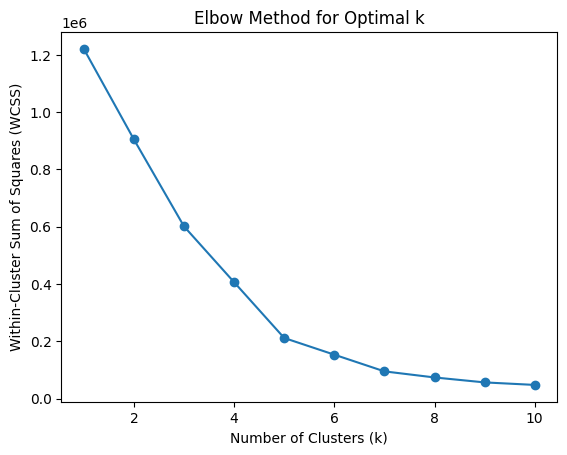

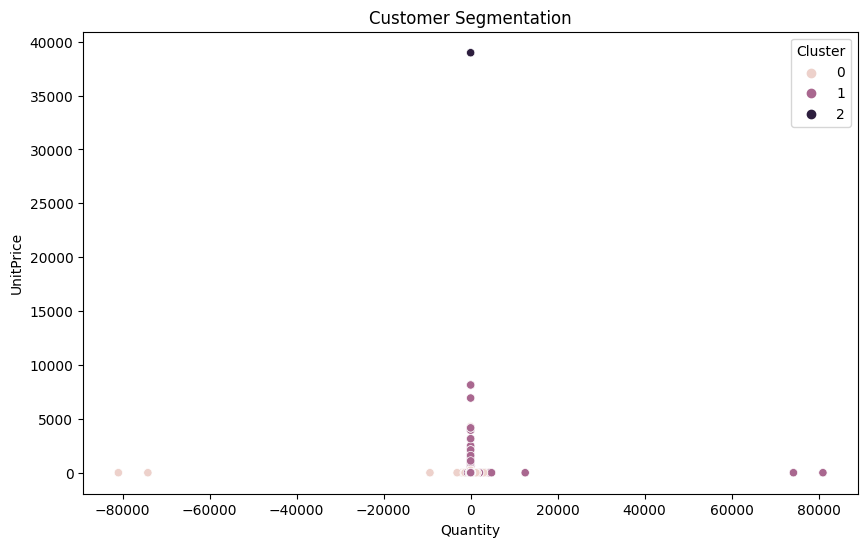

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Quantity', 'UnitPrice', 'CustomerID']


df[features[0]] = pd.to_numeric(df[features[0]], errors='coerce')


df = df.dropna(subset=features)


X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


optimal_clusters = 3


kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=df)
plt.title('Customer Segmentation')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()


Neural network Model

In [ ]:
features = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'CustomerID']
target = ['UnitPrice']

# Handle mixed data types
df[features[3]] = pd.to_numeric(df[features[3]], errors='coerce')

df = df.dropna(subset=features + [target])

# Rmeove categorical columns before standardization
numeric_columns = df[features].select_dtypes(include=[np.number]).columns
X = df[numeric_columns].values
y = df[target].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the nueral network model
y_pred = model.predict(X_test)

# Print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Epoch 1/10
8137/8137 [==============================] - 19s 2ms/step - loss: 6847.9214 - val_loss: 905.2007
Epoch 2/10
8137/8137 [==============================] - 20s 2ms/step - loss: 6845.7163 - val_loss: 905.1808
Epoch 3/10
8137/8137 [==============================] - 18s 2ms/step - loss: 6843.3022 - val_loss: 905.2153
Epoch 4/10
8137/8137 [==============================] - 18s 2ms/step - loss: 6841.3184 - val_loss: 905.2007
Epoch 5/10
8137/8137 [==============================] - 18s 2ms/step - loss: 6842.5708 - val_loss: 905.1466
Epoch 6/10
8137/8137 [==============================] - 18s 2ms/step - loss: 6840.7559 - val_loss: 905.2210
Epoch 7/10
8137/8137 [==============================] - 18s 2ms/step - loss: 6840.2090 - val_loss: 905.1868
Epoch 8/10
8137/8137 [==============================] - 19s 2ms/step - loss: 6840.2324 - val_loss: 905.0595
Epoch 9/10
8137/8137 [==============================] - 20s 2ms/step - loss: 6840.1577 - val_loss: 905.0468
Epoch 10/10
2543/2543 [=====

Predicted vs Actual price

Mean Squared Error on the test set: 6827.952492358093


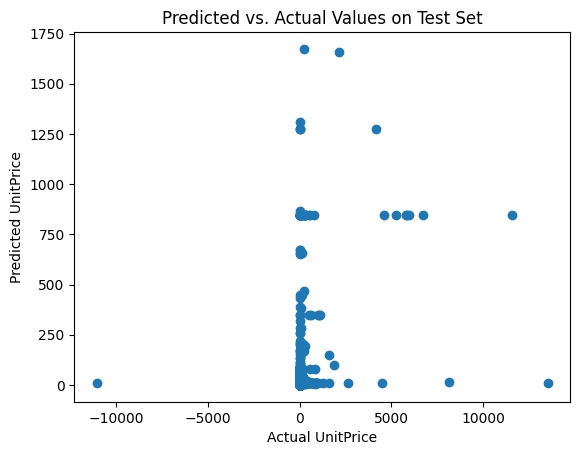

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Values on Test Set')
plt.xlabel('Actual UnitPrice')
plt.ylabel('Predicted UnitPrice')
plt.show()


In [ ]:

features = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'CustomerID']
target = ['UnitPrice']


df[features[3]] = pd.to_numeric(df[features[3]], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=features + [target])


numeric_columns = df[features].select_dtypes(include=[np.number]).columns
X = df[numeric_columns].values
y = df[target].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')


Epoch 1/7
8137/8137 [==============================] - 24s 3ms/step - loss: 6887.6880 - val_loss: 902.9231
Epoch 2/7
8137/8137 [==============================] - 23s 3ms/step - loss: 6845.1104 - val_loss: 902.2432
Epoch 3/7
8137/8137 [==============================] - 25s 3ms/step - loss: 6838.4346 - val_loss: 901.7130
Epoch 4/7
8137/8137 [==============================] - 22s 3ms/step - loss: 6838.0229 - val_loss: 901.5038
Epoch 5/7
8137/8137 [==============================] - 26s 3ms/step - loss: 6838.2295 - val_loss: 901.9396
Epoch 6/7
8137/8137 [==============================] - 21s 3ms/step - loss: 6839.0908 - val_loss: 901.5847
Epoch 7/7
2543/2543 [==============================] - 4s 2ms/step
Mean Squared Error on the test set: 1405.3863990727198


Training and Validation Loss

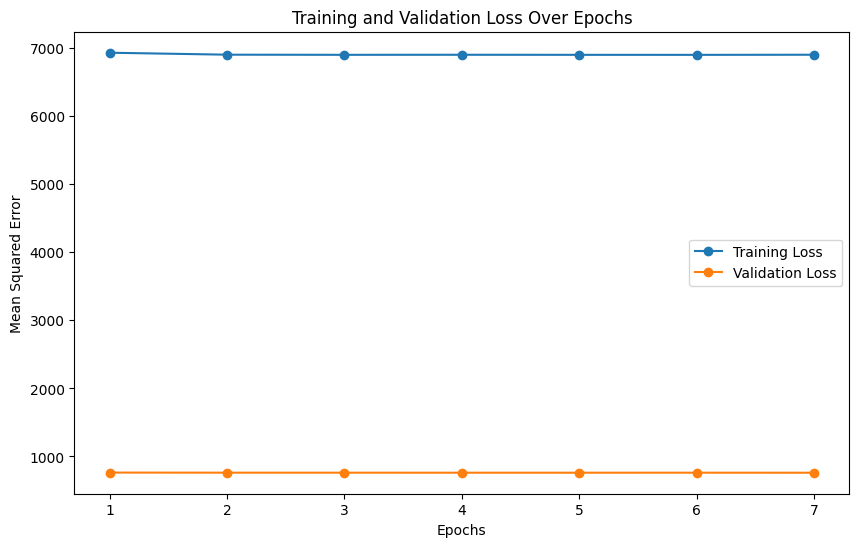

In [ ]:

# Epochs
epochs = [1, 2, 3, 4, 5, 6, 7]

# Training loss
training_loss = [6934.6328, 6905.7769, 6903.7700, 6904.6582, 6903.6318, 6903.2368, 6905.0039]

# Validation loss
validation_loss = [762.9543, 761.4169, 761.0554, 760.9468, 760.9847, 761.0497, 760.7006]


plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Xg boost model

Mean Squared Error on the test set: 7016.637936129618


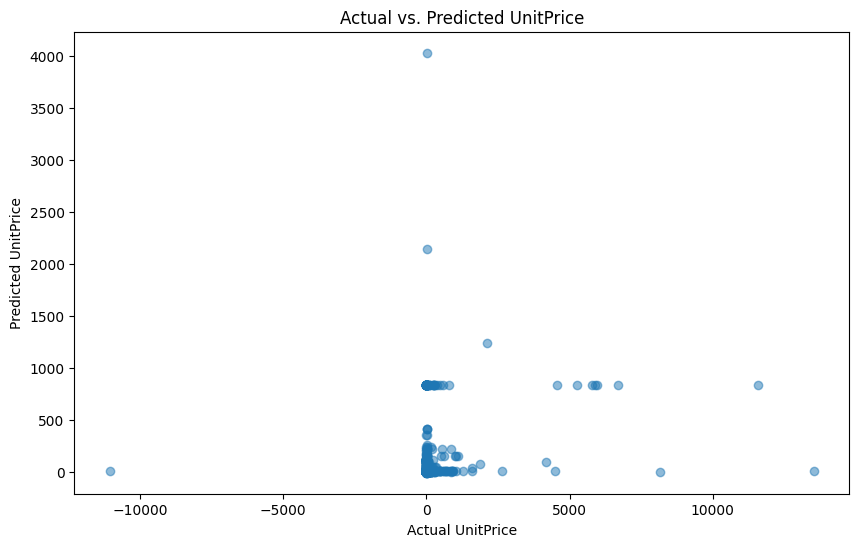

In [25]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


X = df[['Quantity', 'CustomerID']]
y = df['UnitPrice']


df_cleaned = df.dropna(subset=['Quantity', 'UnitPrice'])


X = df_cleaned[['Quantity', 'CustomerID']]
y = df_cleaned['UnitPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

#Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual UnitPrice')
plt.ylabel('Predicted UnitPrice')
plt.title('Actual vs. Predicted UnitPrice')
plt.show()

Random Forest Agressor

<ipython-input-31-5571279df174>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, encoding='latin-1', error_bad_lines=False)


Mean Squared Error on the test set: 6827.952492358093


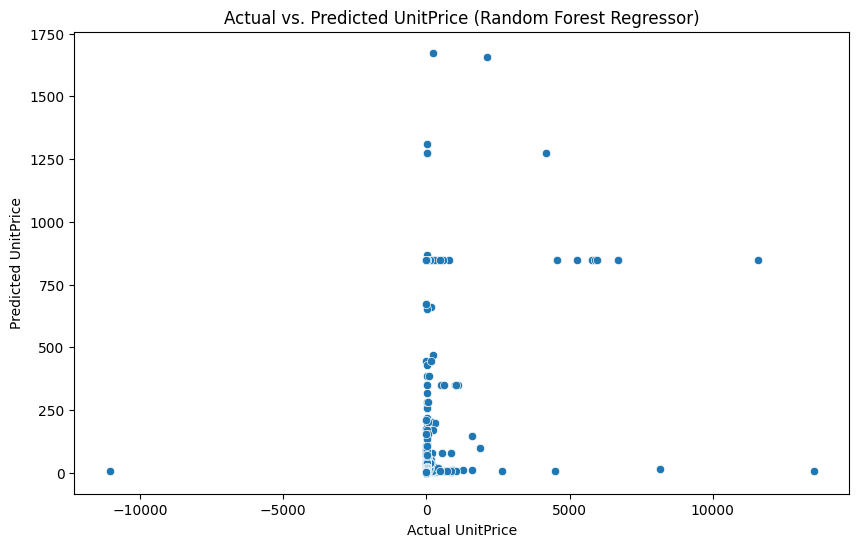

In [ ]:
# Handle mixed data types in Quantity column
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

X = df[['Quantity', 'CustomerID']]
y = df['UnitPrice']

df_cleaned = df.dropna(subset=['Quantity', 'UnitPrice'])

X = df_cleaned[['Quantity', 'CustomerID']]
y = df_cleaned['UnitPrice']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the data
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted UnitPrice (Random Forest Regressor)')
plt.xlabel('Actual UnitPrice')
plt.ylabel('Predicted UnitPrice')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

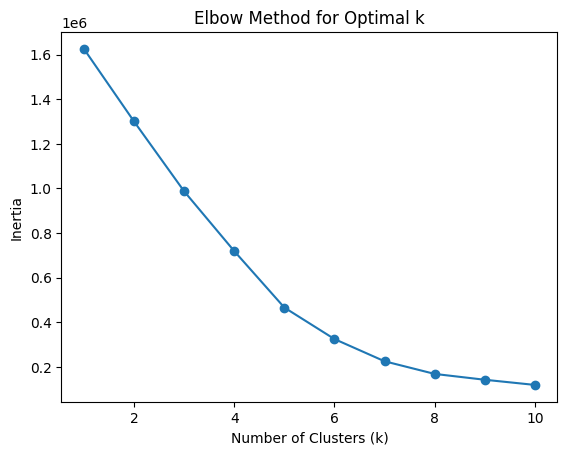

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


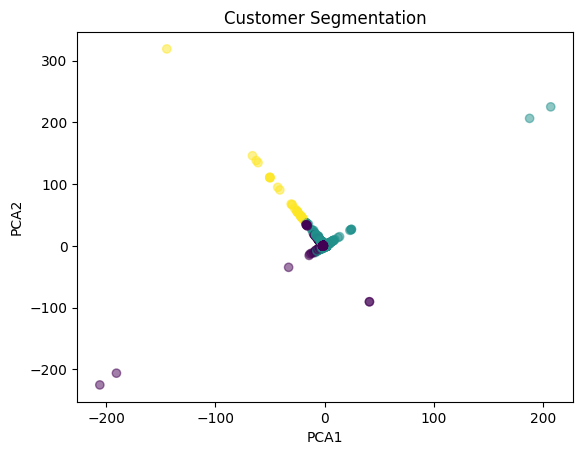

Cluster Summary:
          Quantity    UnitPrice    CustomerID       PCA1       PCA2
Cluster                                                            
0        14.110526     3.437405  13643.835313  -0.837050   0.056015
1         7.320576     4.357061  16568.255710   0.413041  -0.034222
2        -0.806452  9730.436452  15796.250000 -36.021436  79.635917


<ipython-input-33-af6fcdd68e2f>:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [ ]:
if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)

selected_features = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
selected_features_imputed = pd.DataFrame(imputer.fit_transform(selected_features), columns=selected_features.columns)

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features_imputed)

# Determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# From the Elbow plot, choose the optimal number of clusters
optimal_k = 3

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot n
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Display the summary
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

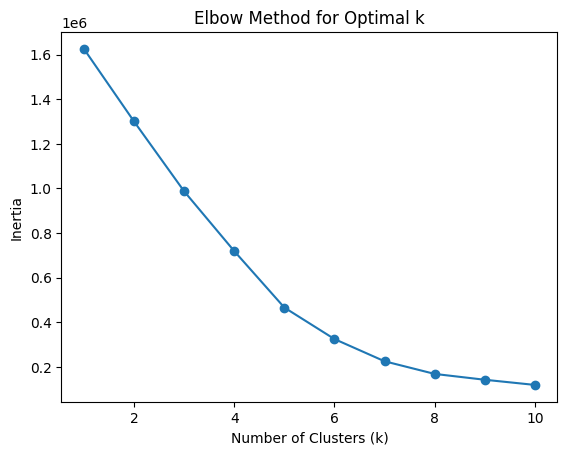

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
selected_features = df[['Quantity', 'UnitPrice', 'CustomerID']]

imputer = SimpleImputer(strategy='mean')
selected_features_imputed = pd.DataFrame(imputer.fit_transform(selected_features), columns=selected_features.columns)

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features_imputed)

#  optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


optimal_k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


X = df.drop('Cluster', axis=1)
y = df['Cluster']